In [15]:
import numpy as np
from sklearn.cluster import KMeans
import os
import random

data_dir = './data/feat'
# data_be = np.load(os.path.join(data_dir, 'be.npy'))
ben = np.load(os.path.join(data_dir, 'BEN.npy'))
rat = np.load(os.path.join(data_dir, 'RAT.npy'))
pst = np.load(os.path.join(data_dir, 'PST.npy'))
spt = np.load(os.path.join(data_dir, 'SPT.npy'))

p = 0.8
ben_len = int(ben.shape[0] * p)
rat_len = int(rat.shape[0] * p)
pst_len = int(pst.shape[0] * p)
spt_len = int(spt.shape[0] * p)

print(ben_len)
print(rat_len)
print(pst_len)
print(spt_len)
# data_ma = np.load(os.path.join(data_dir, 'ma.npy'))
# other = np.load(os.path.join(data_dir, 'other.npy'))
# print(train_data_ma.shape)
# print(train_data_be.shape)
data = np.concatenate([ben[:ben_len, :], rat[: rat_len, :], pst[:pst_len, :], spt[ :spt_len, :]], axis=0)
test_ma = np.concatenate([ben[ben_len:, :], rat[rat_len: , :], pst[pst_len: , :], spt[spt_len:, :]], axis=0)

features = data[:, :-1]  
labels = data[:, -1]     

cluster_centers_dict = {}

unique_labels = np.unique(labels)
print(len(unique_labels))
for label in unique_labels:
    # all features on label_now
    label_features = features[labels == label]
    
    k = 3
    
    # K-Means
    kmeans = KMeans(n_clusters=k, random_state=0).fit(label_features)
    
    cluster_centers = kmeans.cluster_centers_
    
    cluster_centers_dict[label] = cluster_centers.tolist()

for label, centers in cluster_centers_dict.items():
    print(f"标签 {label} 的聚类中心:")
    for center in centers:
        print(center)



5288
62
277
251
4
标签 0.0 的聚类中心:
[0.020778664036241228, -0.1107728924560077, -0.999987806352702, -0.999930273538286, 0.999970971969041, -0.9999997465989806, 0.4952956178365285, -0.9999965962767603, 0.6450491573623466, 0.12920219359242066, -0.908094710284336, 0.0018033446976911116, 0.5390994121185081, -0.6465078733567231, -0.00775905302937345, -0.6836763584546073, -0.11717744146537143, 0.4038425559817738, 0.9999976416609504, 0.9951054403456775, 0.010362772689047423, 0.00023291296921554294, -0.1299322992864937, -0.026254004518182654, -0.10341237716016971, 0.7846414644042541, 0.9177546322413456, -0.40933765950327017, -0.8431863678839395, -0.9232045119069501, -0.7715133050576238, 0.2567498012865493]
[-0.5696281870596649, -0.7249936931315322, -0.7742798783889007, -0.9627719194004216, 0.8936955583156997, -0.9675197052087674, -0.26335533282517937, -0.7516245501173523, 0.9739728699639897, 0.9924911855806392, -0.7735772390437033, -0.21797094335698178, -0.2717892385063901, 0.992183862203138, 0.50

C:\Users\Nine_Dream\anaconda3\envs\pytorch_env_audio\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nine_Dream\anaconda3\envs\pytorch_env_audio\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Nine_Dream\anaconda3\envs\pytorch_env_audio\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Nine_Dream\anaconda3\envs\pytorch_env_audio\lib\site-packages\sklearn

In [16]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import os
from sklearn.metrics import classification_report

data_dir = './data/feat'
test_data = test_ma#np.load(os.path.join(data_dir, 'test.npy'))
# test_data = np.concatenate([test_data, test_ma], axis=0)
# data_ma = np.load(os.path.join(data_dir, 'ma.npy'))

test_features = test_data[:, :-1]
true_labels = test_data[:, -1]

predicted_labels = []


for test_vector in test_features:
    max_similarity = -1  
    predicted_label = None
    
    for label, centers in cluster_centers_dict.items():
        similarities = cosine_similarity([test_vector], centers)
        
        max_label_similarity = np.max(similarities)
        
        if max_label_similarity > max_similarity:
            max_similarity = max_label_similarity
            predicted_label = label
    
    predicted_labels.append(predicted_label)

accuracy = accuracy_score(true_labels, predicted_labels)
precision = precision_score(true_labels, predicted_labels, average='weighted')
recall = recall_score(true_labels, predicted_labels, average='weighted')
f1 = f1_score(true_labels, predicted_labels, average='weighted')


report = classification_report(true_labels, predicted_labels, labels=[0, 1, 2, 3])


print(f"预测标签: {predicted_labels}")
print(f"真实标签: {true_labels.tolist()}")
print(report)
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


预测标签: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 2.0, 2.0, 2.0, 2.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 0.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 3.0, 3.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 3.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 3.0, 0.0, 0.0, 1.0, 0.0, 0.0, 3.0, 0.0, 0.0, 3.0, 3.0, 3.0, 3.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 3.0, 3.0, 3.0, 3.0, 3.0, 0.0, 2.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 3.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 3.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0

C:\Users\Nine_Dream\AppData\Local\Temp\ipykernel_28792\168189274.py:64: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(reduced_centers[indices, 0], reduced_centers[indices, 1],


ValueError: 'c' argument must be a color, a sequence of colors, or a sequence of numbers, not 'darkpurple'

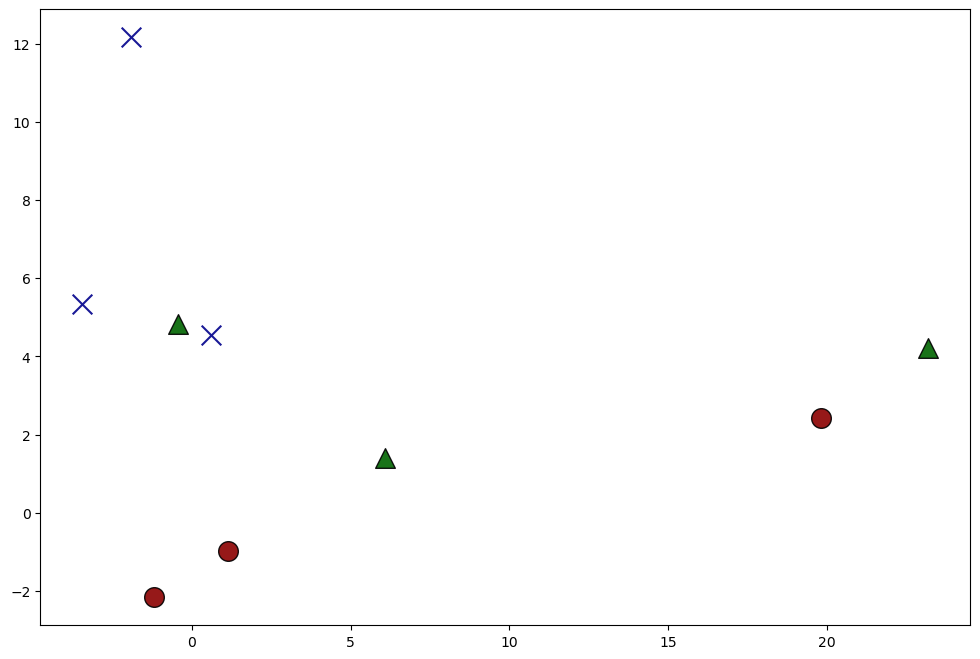

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

all_centers = []
all_center_labels = []

for label, centers in cluster_centers_dict.items():
    all_centers.extend(centers)
    all_center_labels.extend([label] * len(centers))

all_data = np.vstack([test_features, np.array(all_centers)])

scaler = StandardScaler()
all_data = scaler.fit_transform(all_data)

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(all_data)

reduced_test_data = reduced_data[:len(test_features)]
reduced_centers = reduced_data[len(test_features):]

max_test_points = min(len(reduced_test_data), 500) 
max_center_points = min(len(reduced_centers), 500) 
true_labels = np.array(true_labels)
predicted_labels = np.array(predicted_labels)

if len(reduced_test_data) > max_test_points:
    sampled_test_indices = np.random.choice(len(reduced_test_data), max_test_points, replace=False)
    reduced_test_data = reduced_test_data[sampled_test_indices]
    true_labels = true_labels[sampled_test_indices]
    predicted_labels = predicted_labels[sampled_test_indices]

if len(reduced_centers) > max_center_points:
    sampled_center_indices = np.random.choice(len(reduced_centers), max_center_points, replace=False)
    reduced_centers = reduced_centers[sampled_center_indices]
    all_center_labels = np.array(all_center_labels)[sampled_center_indices]

center_colors = ['darkred', 'darkblue', 'darkgreen', 'darkpurple', 'darkorange', 'darkcyan']
sample_colors = ['lightcoral', 'lightblue', 'lightgreen', 'mediumpurple', 'lightsalmon', 'paleturquoise']
markers = ['o', 'x', '^', 's', 'P', 'D']

plt.figure(figsize=(12, 8))

for i, label in enumerate(np.unique(all_center_labels)):
    indices = np.where(all_center_labels == label)
    plt.scatter(reduced_centers[indices, 0], reduced_centers[indices, 1],
                c=center_colors[i % len(center_colors)], marker=markers[i % len(markers)],
                s=200, edgecolor='black', alpha=0.9, label=f'Cluster Center {label}')

for i, label in enumerate(np.unique(true_labels)):
    indices = np.where(true_labels == label)
    plt.scatter(reduced_test_data[indices, 0], reduced_test_data[indices, 1],
                c=sample_colors[i % len(sample_colors)], marker=markers[i % len(markers)],
                s=100, alpha=0.6, label=f'Test Point {label}')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Cluster Centers and Test Points Visualization')
plt.legend()
plt.savefig('./pca.png')
plt.show()
